In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# loading data
df = pd.read_csv("/content/surgeAI_bank_transactions_dataset.csv")
print(df.shape)

(520, 6)


In [ ]:
df.head()

,transaction_text,transaction_value,transaction_type,transaction_description,transaction_category,optional_comments
0,ORTEGA & FIGUEROA TA,300,Debit,This was to pay our accountant for taxes!.,Government/Non-Profit / Taxes,NaN
1,Zelle payment from Alex F BACdd8cksye,45,Credit,Received money from a friend via Zelle.,"Bank Transfers / Third-party transfers (Zelle,...",NaN
2,DAILY GRINDS,15.23,Debit,This is for the purchase of two coffees and a ...,Food & Drink / Coffee and tea,NaN
3,WM SUPERCENTER #4159,15.18,Debit,Purchased groceries from Walmart Supercenter.,Food & Drink / Groceries,NaN
4,DEBIT CARD PURCHASE XXXXX8046 PAYPAL NORTON XX...,106.24,Debit,I was charged for antivirus services.,General Services / Other non-entertainment onl...,NaN


In [ ]:
# we want to predict the transaction category using the features of transaction description
# creating a new dataframe with only 2 columns
df1 = df[['transaction_text', 'transaction_category']].copy()
# removing null values
df1 = df1[pd.notnull(df1['transaction_category'])]

df1.head(3).T

,0,1,2
transaction_text,ORTEGA & FIGUEROA TA,Zelle payment from Alex F BACdd8cksye,DAILY GRINDS
transaction_category,Government/Non-Profit / Taxes,"Bank Transfers / Third-party transfers (Zelle,...",Food & Drink / Coffee and tea


In [ ]:

pd.DataFrame(df1.transaction_category.unique()).values

array([['Government/Non-Profit / Taxes'],
       ['Bank Transfers / Third-party transfers (Zelle, Paypal, Venmo)'],
       ['Food & Drink / Coffee and tea'],
       ['Food & Drink / Groceries'],
       ['General Services / Other non-entertainment online subscriptions'],
       ['Food & Drink / Other'],
       ['Entertainment / TV and movies'],
       ['General Services / Education'],
       ['General Merchandise / Pet supplies'],
       ['Transportation / Gas'],
       ['Loans / Credit card payment'],
       ['Rent & Utilities / Mobile Phone'],
       ['General Merchandise / Electronics'],
       ['General Merchandise / Other'],
       ['Food & Drink / Restaurants'],
       ['General Services / Other insurance'],
       ['Rent & Utilities / Internet'],
       ['Food & Drink / Alcohol & Bars'],
       ['Bank Transfers / Transfers to checking, savings, retirement accounts and other investment accounts'],
       ['Transportation / Automobile maintenance and fees'],
       ['Food & Drink /

In [ ]:
len# using sample data to reduce compute timing 
# df2 = df1.sample(250, random_state=1).copy()
# df2.shape

# since we have a lot of categories we will rename and replace some of them to make our life easier
df1.replace({'transaction_category':{
    'Food & Drink / Coffee and tea':'Food and drinks', 
    'Food & Drink / Groceries': 'Food and drinks', 
    'Food & Drink / Other': 'Food and drinks',
    'Food & Drink / Restaurants': 'Food and drinks',
    'Food & Drink / Alcohol & Bars': 'Food and drinks', 
    'Food & Drink / Fast food': 'Food and drinks', 
    'Food & Drink / Food delivery': 'Food and drinks', 
    'Food & Drink / Vending machines': 'Food and drinks', 
    'Food & Drink / Bakeries, ice cream shops and dessert shops': 'Food and drinks',
    'Transportation / Gas': 'Transportation',
    'Transportation / Automobile maintenance and fees': 'Transportation', 
    'Transportation / Parking': 'Transportation', 
    'Transportation / Taxis and ride shares': 'Transportation',
    'Transportation / Tolls': 'Transportation', 
    'Transportation / Public Transport': 'Transportation', 
    'Travel / Flights': 'Transportation', 
    'Travel / Rental cars':'Transportation', 
    'Travel / Other' : 'Transportation',
    'Travel / Lodging': 'Transportation',
    'General Services / Other non-entertainment online subscriptions': 'General Services', 
    'General Services / Education': 'General Services', 
    'General Services / Other insurance': 'General Services', 
    'General Services / Auto insurance': 'General Services',
    'General Services / Home Repair/Maintenance': 'General Services',
    'General Services / Service refunds': 'General Services', 
    'General Services / Other': 'General Services', 
    'General Services / Health & Fitness': 'General Services', 
    'General Services / Childcare': 'General Services', 
    'General Services / Shipping & Postage': 'General Services', 
    'General Services / Cloud storage': 'General Services', 
    'General Services / Service refunds': 'General Services',
    'General Services / Education': 'General Services',
    'General Services / Health insurance' : 'General Services',
    'General Merchandise / Online marketplaces': 'General Merchandise', 
    'General Merchandise / Beauty, cosmetics, personal care items and toiletries': 'General Merchandise',
    'General Merchandise / Sporting goods': 'General Merchandise',
    'General Merchandise / Books': 'General Merchandise',
    'General Merchandise / Clothing': 'General Merchandise',
    'General Merchandise / Houseware': 'General Merchandise', 
    'General Merchandise / Product refunds': 'General Merchandise',
    'General Merchandise / Other': 'General Merchandise',
    'General Merchandise / Electronics': 'General Merchandise',
    'General Merchandise / Pet supplies': 'General Merchandise',
    'Bank Transfers / Third-party transfers (Zelle, Paypal, Venmo)': 'Bank Transfers', 
    'Bank Transfers / Transfers to checking, savings, retirement accounts and other investment accounts': 'Bank Transfers',
    'Bank Transfers / Overdraft fees': 'Bank Transfers', 
    'Bank Transfers / Foreign transaction fees': 'Bank Transfers', 
    'Bank Transfers / ATM withdrawals': 'Bank Transfers', 
    'Bank Transfers / ATM fees': 'Bank Transfers', 
    'Bank Transfers / Banking rewards': 'Bank Transfers',
    'Bank Transfers / Other bank fees': 'Bank Transfers', 
    'Bank Transfers / Bank refunds': 'Bank Transfers',
    'Loans / Credit card payment': 'Bank Transfers', 
    'Loans / Car loan payments': 'Bank Transfers', 
    'Loans / Mortgage payments': 'Bank Transfers', 
    'Loans / Personal loans':'Bank Transfers',
    'Entertainment / TV and movies': 'Entertainment', 
    'Entertainment / Casinos and gambling': 'Entertainment', 
    'Entertainment / Video games': 'Entertainment',
    'Entertainment / Music': 'Entertainment',
    'Entertainment / Amusement Parks': 'Entertainment', 
    'Entertainment / Other': 'Entertainment',
    'Rent & Utilities / Mobile Phone': 'Rent and Utilities', 
    'Rent & Utilities / Internet': 'Rent and Utilities', 
    'Rent & Utilities / Electricity, natural gas and propane energy': 'Rent and Utilities', 
    'Rent & Utilities / Rent': 'Rent and Utilities', 
    'Rent & Utilities / Water': 'Rent and Utilities',
    'Income / Wages, gig economy, tips': 'Income',
    'Income / Interest, investment returns, and dividends': 'Income',
    'Income / Other': 'Income',
    'Income / Tax refund': 'Income',
    'Income / Child support, alimony': 'Income',
    'Medical / Pharmacies and supplements': 'Medical',
    'Medical / Primary, dental, eye, and nursing care': 'Medical',
    'Medical / Veterinary services': 'Medical',
    'Government/Non-Profit / Taxes': 'Government',
    'Government/Non-Profit / Other donations': 'Government', 
    'Government/Non-Profit / Other': 'Government',
    'Government/Non-Profit / Political donations': 'Government'
    }},
    inplace = True)

pd.DataFrame(df1.transaction_category.unique())

,0
0,Government
1,Bank Transfers
2,Food and drinks
3,General Services
4,Entertainment
5,General Merchandise
6,Transportation
7,Rent and Utilities
8,Medical
9,Income


In [ ]:
# Create a new column 'category_id' with encoded categories 
df1['category_id'] = df1['transaction_category'].factorize()[0]
category_id_df = df1[['transaction_category', 'category_id']].drop_duplicates()

In [ ]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'transaction_category']].values)
# New dataframe
df1.head()

,transaction_text,transaction_category,category_id
0,ORTEGA & FIGUEROA TA,Government,0
1,Zelle payment from Alex F BACdd8cksye,Bank Transfers,1
2,DAILY GRINDS,Food and drinks,2
3,WM SUPERCENTER #4159,Food and drinks,2
4,DEBIT CARD PURCHASE XXXXX8046 PAYPAL NORTON XX...,General Services,3


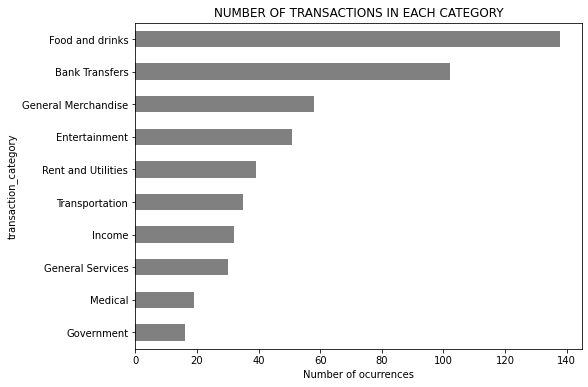

In [ ]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df1.groupby('transaction_category').transaction_text.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF TRANSACTIONS IN EACH CATEGORY')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        ngram_range=(1, 2), 
                        stop_words='english')


# We transform each text into a vector
features = tfidf.fit_transform(df1.transaction_text).toarray()
labels = df1.category_id
print("Each of the %d  categories is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 520  categories is represented by 3035 features (TF-IDF score of unigrams and bigrams)


In [ ]:
# Finding the three most correlated terms with each of the product categories
N = 3
for text_category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(text_category))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

n==> Bank Transfers:
  * Most Correlated Unigrams are: fee, capital, pmt
  * Most Correlated Bigrams are: external withdrawal, online pmt, ach withdrawal
n==> Entertainment:
  * Most Correlated Unigrams are: spotify, netflix, google
  * Most Correlated Bigrams are: jose ca, google youngjoy, netflix com
n==> Food and drinks:
  * Most Correlated Unigrams are: 2nd, streetsuite, doordash
  * Most Correlated Bigrams are: withdrawal doordash, 303 2nd, 2nd streetsuite
n==> General Merchandise:
  * Most Correlated Unigrams are: bath, body, mktp
  * Most Correlated Bigrams are: bath body, amzn mktp, pos purchase
n==> General Services:
  * Most Correlated Unigrams are: norton, az, insurance
  * Most Correlated Bigrams are: norton xxxxx7733, xxxxx7733 az, paypal norton
n==> Government:
  * Most Correlated Unigrams are: gfm, gofundme, irs
  * Most Correlated Bigrams are: des usataxpymt, roadogs rescue, gfm gofundme
n==> Income:
  * Most Correlated Unigrams are: des, paid, dividend
  * Most Correla

In [ ]:
X = df1['transaction_text'] # Collection of documents
y = df1['transaction_category'] # Target or the labels we want to predict 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [ ]:

models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [ ]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.538462,0.040224
LogisticRegression,0.451923,0.006799
MultinomialNB,0.421154,0.020846
RandomForestClassifier,0.367308,0.025801


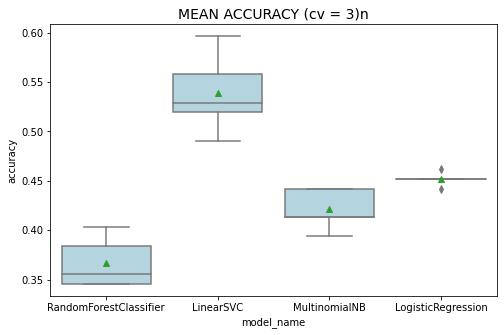

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 3)n", size=14);

In [ ]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df1.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Classification report
print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, target_names=df1['transaction_category'].unique()))

ttttCLASSIFICATIION METRICSn
                     precision    recall  f1-score   support

         Government       0.00      0.00      0.00         1
     Bank Transfers       0.40      0.90      0.56        21
    Food and drinks       0.55      0.78      0.64        37
   General Services       1.00      0.17      0.29         6
      Entertainment       0.57      0.80      0.67        10
General Merchandise       0.50      0.12      0.20        24
     Transportation       1.00      0.10      0.18        10
 Rent and Utilities       1.00      0.38      0.55         8
            Medical       0.50      0.20      0.29         5
             Income       1.00      0.38      0.55         8

           accuracy                           0.52       130
          macro avg       0.65      0.38      0.39       130
       weighted avg       0.62      0.52      0.47       130



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


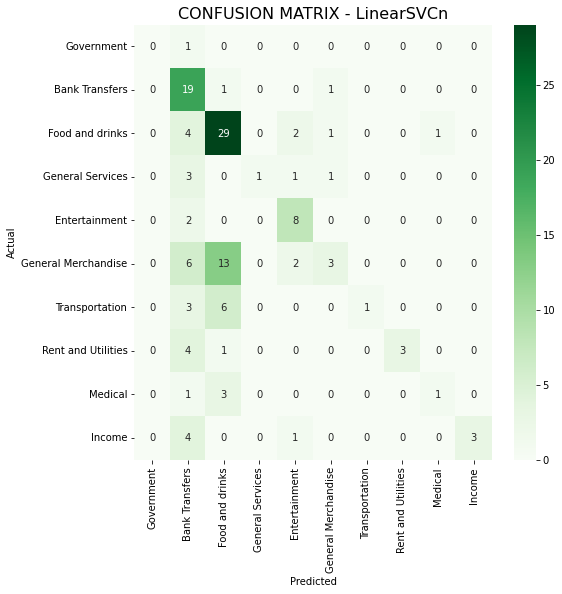

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Greens", fmt='d',
            xticklabels=category_id_df.transaction_category.values, 
            yticklabels=category_id_df.transaction_category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [ ]:
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [ ]:
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [ ]:
prod = input("enter your bank statement: ")
print(model.predict(fitted_vectorizer.transform([prod])))

enter your bank statement: taxes
['Food and drinks']
